In [1]:
%matplotlib inline
import pprint
from matplotlib import pyplot as plt
import plantcv as pcv

In [2]:
# Set variables
device = 0                                    # Workflow step counter
debug = 'plot'                                # Plot debug images to the notebook
vis_img = 'VIS_SV_0_z1_h1_g0_e82_1224684.png' # Example image

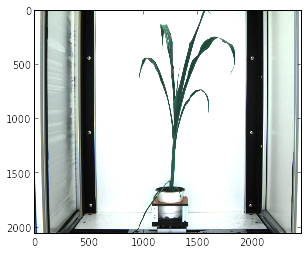

In [3]:
# Read VIS image
img, path, filename = pcv.readimage(vis_img)
plt.imshow(img)
plt.show()

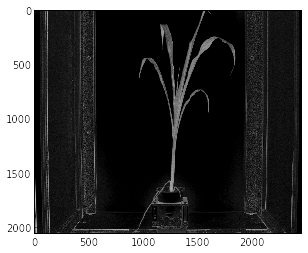

In [4]:
# Convert RGB to HSV and extract the Saturation channel
device, s = pcv.rgb2gray_hsv(img, 's', device, debug)

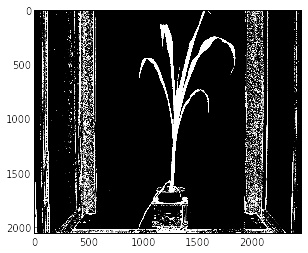

In [5]:
# Threshold the Saturation image
device, s_thresh = pcv.binary_threshold(s, 36, 255, 'light', device, debug)

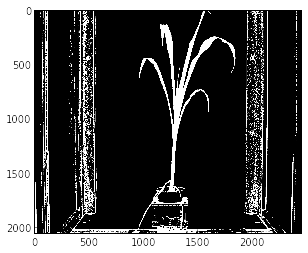

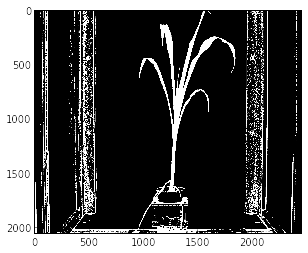

In [6]:
# Median Filter
device, s_mblur = pcv.median_blur(s_thresh, 5, device, debug)
device, s_cnt = pcv.median_blur(s_thresh, 5, device, debug)

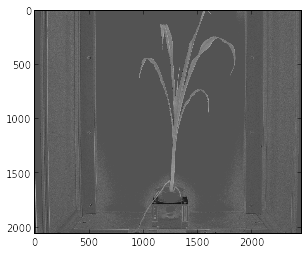

In [7]:
# Convert RGB to LAB and extract the Blue channel
device, b = pcv.rgb2gray_lab(img, 'b', device, debug)

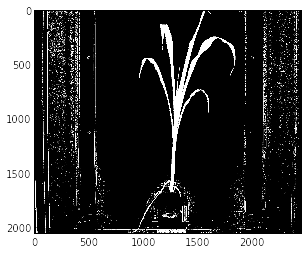

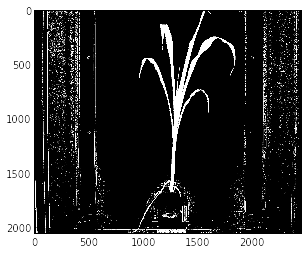

In [8]:
# Threshold the blue image
device, b_thresh = pcv.binary_threshold(b, 137, 255, 'light', device, debug)
device, b_cnt = pcv.binary_threshold(b, 137, 255, 'light', device, debug)

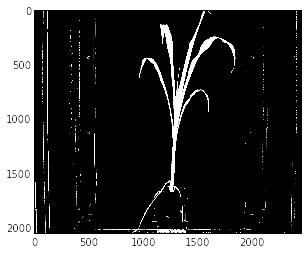

In [9]:
# Join the thresholded saturation and blue-yellow images
device, bs = pcv.logical_and(s_mblur, b_cnt, device, debug)

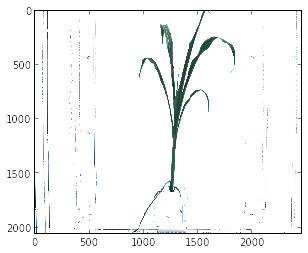

In [10]:
# Apply Mask (for vis images, mask_color=white)
device, masked = pcv.apply_mask(img, bs, 'white', device, debug)

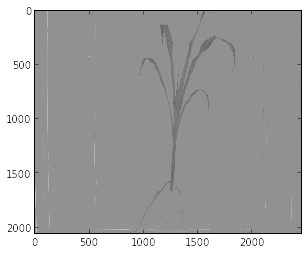

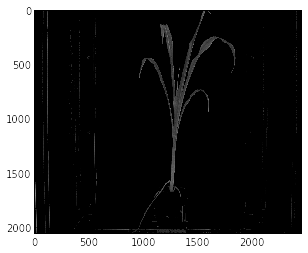

In [11]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
device, masked_a = pcv.rgb2gray_lab(masked, 'a', device, debug)
device, masked_b = pcv.rgb2gray_lab(masked, 'b', device, debug)

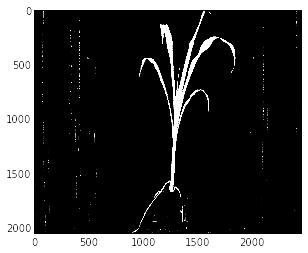

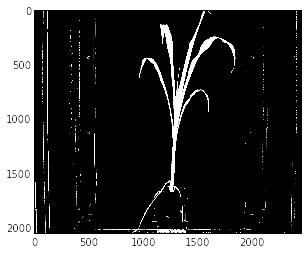

In [12]:
# Threshold the green-magenta and blue images
device, maskeda_thresh = pcv.binary_threshold(masked_a, 127, 255, 'dark', device, debug)
device, maskedb_thresh = pcv.binary_threshold(masked_b, 128, 255, 'light', device, debug)

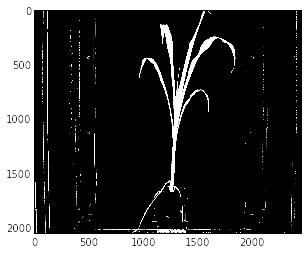

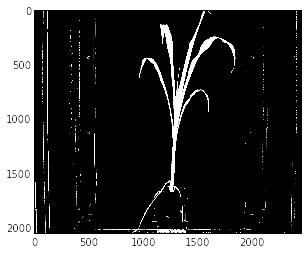

In [13]:
# Join the thresholded saturation and blue-yellow images (OR)
device, ab = pcv.logical_or(maskeda_thresh, maskedb_thresh, device, debug)
device, ab_cnt = pcv.logical_or(maskeda_thresh, maskedb_thresh, device, debug)

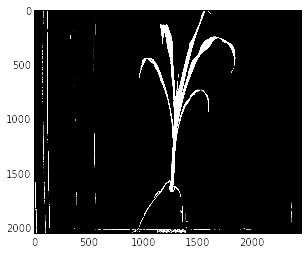

In [14]:
# Fill small noise
device, ab_fill1 = pcv.fill(ab, ab_cnt, 200, device, debug)

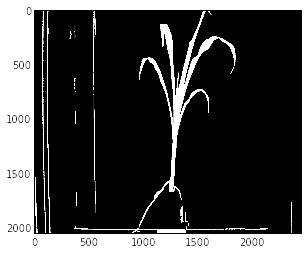

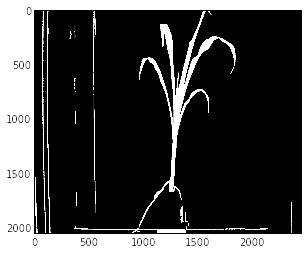

In [15]:
# Dilate to join small objects with larger ones
device, ab_cnt1 = pcv.dilate(ab_fill1, 3, 2, device, debug)
device, ab_cnt2 = pcv.dilate(ab_fill1, 3, 2, device, debug)

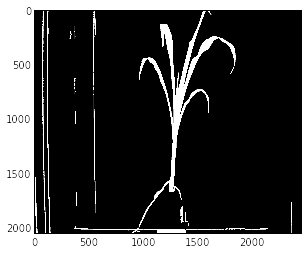

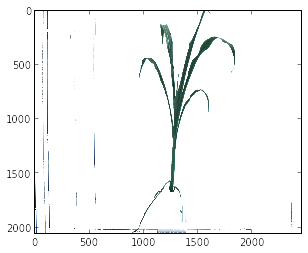

In [16]:
# Fill dilated image mask
device, ab_cnt3 = pcv.fill(ab_cnt2, ab_cnt1, 150, device, debug)
device, masked2 = pcv.apply_mask(masked, ab_cnt3, 'white', device, debug)

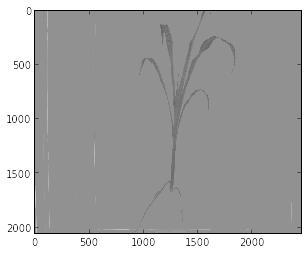

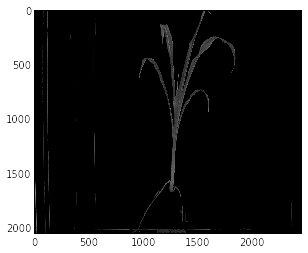

In [17]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
device, masked2_a = pcv.rgb2gray_lab(masked2, 'a', device, debug)
device, masked2_b = pcv.rgb2gray_lab(masked2, 'b', device, debug)

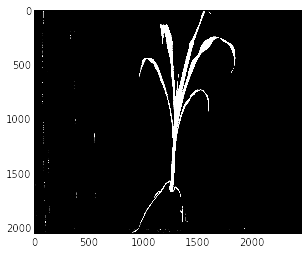

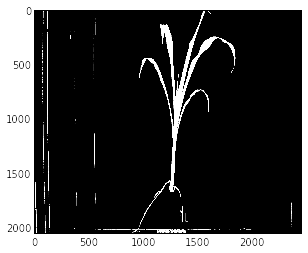

In [18]:
# Threshold the green-magenta and blue images
device, masked2a_thresh = pcv.binary_threshold(masked2_a, 127, 255, 'dark', device, debug)
device, masked2b_thresh = pcv.binary_threshold(masked2_b, 128, 255, 'light', device, debug)

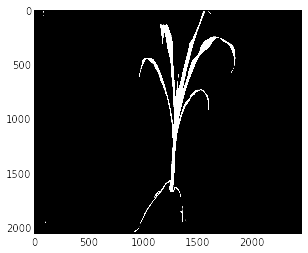

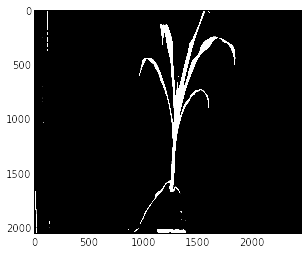

In [19]:
# Median blur the thresholded image to break up vertical background edges
device, masked2a_thresh_blur = pcv.median_blur(masked2a_thresh, 5, device, debug)
device, masked2b_thresh_blur = pcv.median_blur(masked2b_thresh, 13, device, debug)

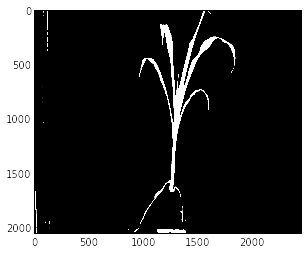

In [20]:
# Fill background objects for median blurred image
device, ab_fill = pcv.logical_or(masked2a_thresh_blur, masked2b_thresh_blur, device, debug)

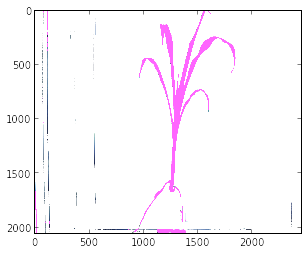

In [21]:
# Identify objects
device, id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill, device, debug)

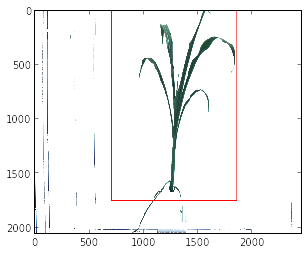

In [22]:
# Define ROI
device, roi1, roi_hierarchy = pcv.define_roi(masked2, 'rectangle', device, None, 'default', debug, True, 
                                             700, 0, -600, -300)

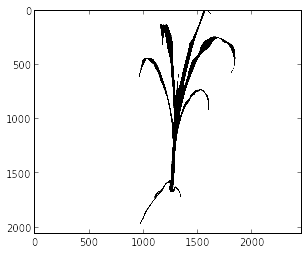

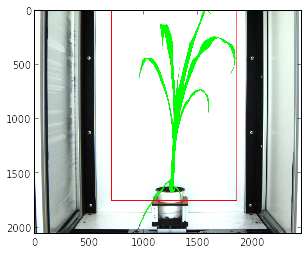

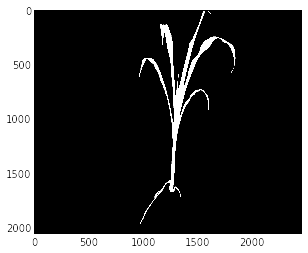

In [23]:
# Decide which objects to keep
device, roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img, 'partial', roi1, roi_hierarchy,
                                                                           id_objects, obj_hierarchy, device,
                                                                           debug)

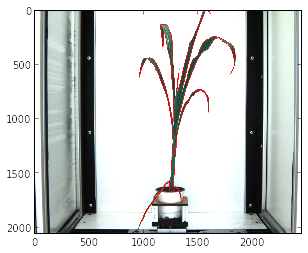

In [24]:
# Object combine kept objects
device, obj, mask = pcv.object_composition(img, roi_objects, hierarchy3, device, debug)

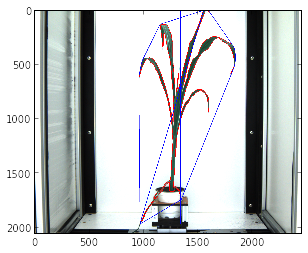

In [25]:
# Find shape properties, output shape image (optional)
device, shape_header, shape_data, shape_img = pcv.analyze_object(img, vis_img, obj, mask, device, debug)

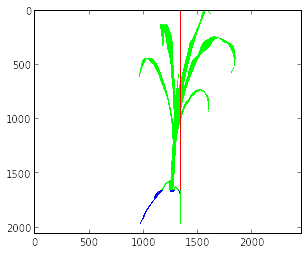

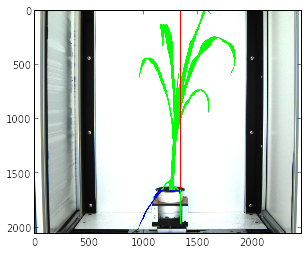

In [26]:
# Shape properties relative to user boundary line (optional)
device, boundary_header, boundary_data, boundary_img1 = pcv.analyze_bound(img, vis_img, obj, mask, 400, device, debug)

In [27]:
# Determine color properties
device, color_header, color_data, color_img = pcv.analyze_color(img, vis_img, mask, 256, device, debug, None, 'v',
                                                                'img', 300)

In [28]:
# Output shape and color data
vis_traits = {}
for i in range(1, len(shape_header)):
    vis_traits[shape_header[i]] = shape_data[i]
for i in range(1, len(boundary_header)):
    vis_traits[boundary_header[i]] = boundary_data[i]
for i in range(1, len(color_header)):
    vis_traits[color_header[i]] = color_data[i]

pp = pprint.PrettyPrinter(indent = 4, depth = 1)
pp.pprint(vis_traits)

{   'above_bound_area': 153612,
    'area': 159071.0,
    'below_bound_area': 5459,
    'bin-number': 256,
    'blue': [...],
    'blue-yellow': [...],
    'center-of-mass-x': 1332.464176374072,
    'center-of-mass-y': 715.3630894380497,
    'ellipse_angle': 24.473690032958984,
    'ellipse_center_x': 1232.4078369140625,
    'ellipse_center_y': 950.31103515625,
    'ellipse_eccentricity': 0.86892970620483678,
    'ellipse_major_axis': 1677.945068359375,
    'ellipse_minor_axis': 830.474609375,
    'green': [...],
    'green-magenta': [...],
    'height': 1962,
    'height_above_bound': 1655,
    'height_below_bound': 307,
    'hue': [...],
    'hull-area': 1129864.0,
    'hull_vertices': 35,
    'in_bounds': False,
    'lightness': [...],
    'longest_axis': 1960,
    'percent_above_bound_area': 96.56819910605957,
    'percent_below_bound_area': 3.431800893940442,
    'perimeter': 14745.248272299767,
    'red': [...],
    'saturation': [...],
    'solidity': 0.14078774082544449,
    'v